In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yashvrdnjain/hotdognothotdog")

print("Path to dataset files:", path)

Path to dataset files: /home/pham/.cache/kagglehub/datasets/yashvrdnjain/hotdognothotdog/versions/1


In [3]:
import pandas as pd
import numpy as np
import os
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory

2025-04-22 17:55:15.231835: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-22 17:55:15.232327: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-22 17:55:15.234722: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-22 17:55:15.241313: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745362515.252278    6559 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745362515.25

In [10]:
directory = f'{path}/hotdog-nothotdog/train/'
val_directory = f'{path}/hotdog-nothotdog/test/'

In [12]:
train_dataset = image_dataset_from_directory(directory, image_size=(180, 180), batch_size = 32)
validation_dataset = image_dataset_from_directory(val_directory, image_size=(180, 180), batch_size = 32)

Found 3000 files belonging to 2 classes.
Found 644 files belonging to 2 classes.


In [14]:
for data_batch, labels_batch in train_dataset:
    print('data batch  shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch  shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [22]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs = inputs, outputs=outputs)

In [24]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [16]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='hotdog_convnet.keras',
        save_best_only=True,
        monitor='val_loss')
]

In [32]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 45s 478ms/step - accuracy: 0.5216 - loss: 0.7243 - val_accuracy: 0.6320 - val_loss: 0.6504
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 45s 476ms/step - accuracy: 0.6400 - loss: 0.6504 - val_accuracy: 0.6568 - val_loss: 0.6186
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 45s 475ms/step - accuracy: 0.6587 - loss: 0.6193 - val_accuracy: 0.5435 - val_loss: 0.7608
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 45s 474ms/step - accuracy: 0.6837 - loss: 0.5997 - val_accuracy: 0.6646 - val_loss: 0.6188
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 45s 484ms/step - accuracy: 0.6896 - loss: 0.5858 - val_accuracy: 0.6553 - val_loss: 0.6671
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 45s 473ms/step - accuracy: 0.7041 - loss: 0.5719 - val_accuracy: 0.6941 - val_loss: 0.5999
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 44s 469ms/step - accuracy: 0.7338 - loss: 0.5387 - val_accuracy: 0.5575 - val_loss: 1.1312
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 44s 472ms/step - accuracy: 0.7558 - loss: 0.5181 - val_accu

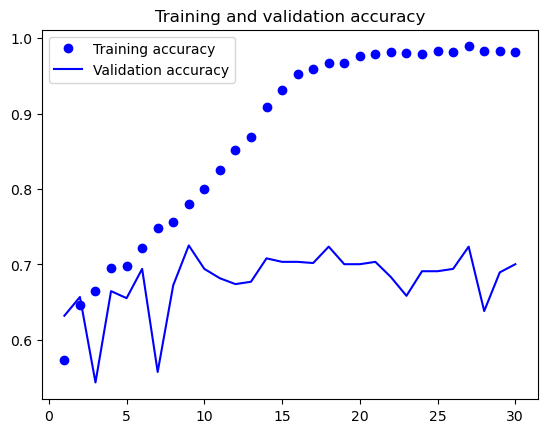

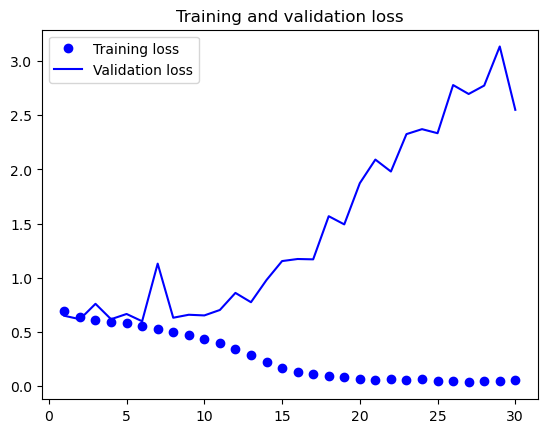

In [34]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()